 # <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Project in Computer Vision - 2

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Import all required modules

In [2]:
%matplotlib inline

import math as math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Functions 

In [154]:
from platform import python_version 
python_version()

'3.9.12'

# <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> PART - A (Entertainment)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q1 A - Import and read ‘images.npy’.

In [155]:
images = np.load('input/images (3).npy', allow_pickle=True)

In [156]:
print(f"type is {type(images)}")
print(images)

type is <class 'numpy.ndarray'>
[[array([[[42, 37, 34],
          [56, 51, 48],
          [71, 66, 63],
          ...,
          [23, 33, 34],
          [26, 36, 37],
          [28, 38, 39]],

         [[40, 35, 32],
          [51, 46, 43],
          [64, 59, 56],
          ...,
          [27, 36, 35],
          [24, 33, 32],
          [26, 35, 34]],

         [[43, 38, 35],
          [51, 46, 43],
          [61, 56, 53],
          ...,
          [28, 30, 27],
          [33, 35, 32],
          [35, 37, 34]],

         ...,

         [[56, 47, 40],
          [57, 48, 41],
          [61, 52, 45],
          ...,
          [67, 48, 42],
          [55, 35, 28],
          [60, 40, 33]],

         [[53, 44, 37],
          [54, 45, 38],
          [57, 48, 41],
          ...,
          [59, 40, 34],
          [60, 40, 33],
          [54, 34, 27]],

         [[53, 44, 37],
          [54, 45, 38],
          [57, 48, 41],
          ...,
          [59, 40, 34],
          [70, 50, 43],
          [64

In [157]:
images.shape

(409, 2)

In [158]:
# SOme Randome Image array
images[0][0]

array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8)

In [159]:
# Image shape at randomly selected index
print(f"{images[0][0].shape} {images[10][0].shape} {images[408][0].shape}")

(333, 650, 3) (337, 600, 3) (493, 656, 3)


In [160]:
images[0][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}],
  'imageWidth': 650,
  'imageHeight': 333},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}],
  'imageWidth': 650,
  'imageHeight': 333}]

In [161]:
data = images[1][1]
data[0]['points'][0]['x']

0.7053087757313109

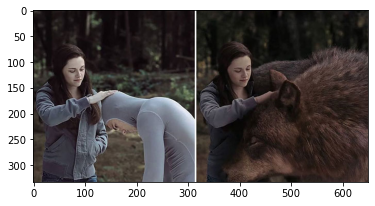

In [162]:
plt.imshow(images[0][0])

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q1 B - Split the data into Features(X) & labels(Y). Unify shape of all the images.
     

In [163]:
import skimage.transform as st
import cv2
from PIL import ImageTk, Image
from tensorflow.keras.applications.mobilenet import preprocess_input


length = len(images)
X = np.empty((length, 256, 256,3))
Y = np.empty((length, 256, 256))

for i in range(length):
    #print(images[i][0].shape)
    #resized_image = st.resize(images[i][0], (256, 256), 3)
    resized_image = cv2.resize(images[i][0], dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
    #print(resized_image.shape)
    #print(f"{i} Shape before ressizing {images[i][0].shape} and after resizing {resized_image.shape}")
    if i == -10: # It never breaks
        print("do not expect this line")
        break
    #X[i] = resized_image
    
    # Lot of images are having alpha channel remove it
    # Few channels are having with out any channel, convert them to grayscale.
    if len(resized_image.shape) == 2:
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)
    else:
        resized_image = resized_image[:,:,:3]
    X[i] = preprocess_input(np.array(resized_image, dtype=np.float32))
    for j in images[i][1]:
        x1 = int(j['points'][0]['x'] * 256)
        x2 = int(j['points'][1]['x'] * 256)
        y1 = int(j['points'][0]['y'] * 256)
        y2 = int(j['points'][1]['y'] * 256)
        Y[i][y1:y2, x1:x2] = 1

In [164]:
print(f"{X.shape} and {Y.shape}")

(409, 256, 256, 3) and (409, 256, 256)


In [165]:
X

array([[[[-0.60000002, -0.63921571, -0.66274512],
         [-0.39607841, -0.43529409, -0.4588235 ],
         [-0.52941179, -0.56862748, -0.59215689],
         ...,
         [-0.82745099, -0.74901962, -0.74117649],
         [-0.83529413, -0.75686276, -0.74901962],
         [-0.79607844, -0.71764708, -0.70980394]],

        [[-0.63137257, -0.67058825, -0.69411767],
         [-0.45098037, -0.49019605, -0.51372552],
         [-0.50588238, -0.54509807, -0.56862748],
         ...,
         [-0.89019608, -0.84313726, -0.85882354],
         [-0.83529413, -0.78823531, -0.79607844],
         [-0.78039217, -0.73333335, -0.74901962]],

        [[-0.60784316, -0.64705884, -0.67058825],
         [-0.49019605, -0.52941179, -0.5529412 ],
         [-0.49019605, -0.52941179, -0.5529412 ],
         ...,
         [-0.81176472, -0.81176472, -0.8509804 ],
         [-0.80392158, -0.80392158, -0.84313726],
         [-0.73333335, -0.73333335, -0.77254903]],

        ...,

        [[-0.52941179, -0.60000002, -0

In [166]:
Y

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q1 C - Split the data into train and test[400:9]
  

In [167]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=104, test_size=9)

In [168]:
print(f"{x_train.shape}, {x_test.shape}, {y_train.shape}, {y_test.shape}")

(400, 256, 256, 3), (9, 256, 256, 3), (400, 256, 256), (9, 256, 256)


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q1 D    Select random image from the train data and display original image and masked image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


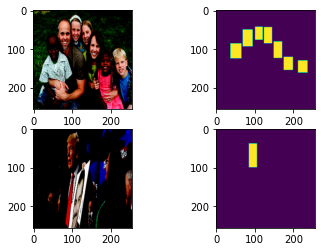

In [169]:
f, ax = plt.subplots(2,2)
ax[0,0].imshow(x_train[100])
ax[0,1].imshow(y_train[100])
ax[1,0].imshow(x_train[4])
ax[1,1].imshow(y_train[4])

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q2 A - Design a face mask detection model.

In [170]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D,Activation, Concatenate,BatchNormalization
from tensorflow.keras.models import Model


def get_model():
    inputs = Input(shape=(256, 256, 3), name="input_image")
    
    mobilenet_model = MobileNetV2(input_tensor=inputs, weights="imagenet", include_top=False, alpha=0.35)
   # print(mobilenet_model.summary())
    
    skip_connection_names = ["input_image", "block_1_expand_relu", "block_3_expand_relu", "block_6_expand_relu"]
    encoder_output = mobilenet_model.get_layer("block_13_expand_relu").output
    
    filters = [128,48,32,16]
    x = encoder_output
    print(x)
    for i in range(1, len(skip_connection_names)+1, 1):
        x_skip = mobilenet_model.get_layer(skip_connection_names[-i]).output
        x = UpSampling2D((2, 2))(x)
        x = Concatenate()([x, x_skip])
        #print(f"Filters[-i] is {filters[i-1]}")
        x = Conv2D(filters[i-1], (3, 3), padding="same")(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
        
        x = Conv2D(filters[i-1], (3, 3), padding="same")(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
        
    x = Conv2D(1, (1, 1), padding="same")(x)
    x = Activation("sigmoid")(x)
    
    model = Model(inputs, x)
    return model

In [171]:
model = get_model()
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 192), dtype=tf.float32, name=None), name='block_13_expand_relu/Relu6:0', description="created by layer 'block_13_expand_relu'")
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 16  432         ['input_image[0][0]']            
                                )                                                                 
                                                                                                  
 bn_Conv1

                                                                                                  
 block_3_expand_BN (BatchNormal  (None, 64, 64, 48)  192         ['block_3_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_3_expand_relu (ReLU)     (None, 64, 64, 48)   0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 65, 65, 48)   0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 32, 32, 48)  432         ['block_3_pad[0][0]']            
 nv2D)                                                                                            
          

                                                                                                  
 block_6_project (Conv2D)       (None, 16, 16, 24)   2304        ['block_6_depthwise_relu[0][0]'] 
                                                                                                  
 block_6_project_BN (BatchNorma  (None, 16, 16, 24)  96          ['block_6_project[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 16, 16, 144)  3456        ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 16, 16, 144)  576        ['block_7_expand[0][0]']         
 ization)                                                                                         
          

 onv2D)                                                                                           
                                                                                                  
 block_10_depthwise_BN (BatchNo  (None, 16, 16, 144)  576        ['block_10_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 16, 16, 144)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 16, 16, 32)   4608        ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 16, 16, 32)  128         ['block_10_project[0][0]']       
 alization

 activation_28 (Activation)     (None, 32, 32, 128)  0           ['batch_normalization_25[0][0]'] 
                                                                                                  
 up_sampling2d_13 (UpSampling2D  (None, 64, 64, 128)  0          ['activation_28[0][0]']          
 )                                                                                                
                                                                                                  
 concatenate_13 (Concatenate)   (None, 64, 64, 176)  0           ['up_sampling2d_13[0][0]',       
                                                                  'block_3_expand_relu[0][0]']    
                                                                                                  
 conv2d_29 (Conv2D)             (None, 64, 64, 48)   76080       ['concatenate_13[0][0]']         
                                                                                                  
 batch_nor

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q2 B - Design your own Dice Coefficient and Loss function.


In [172]:
#def dice_coefficient(y_true, y_pred):
    #numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    #denominator = tensorflow.reduce_sum(y_true + y_pred)

    #return numerator / (denominator + tensorflow.keras.backend.epsilon())

#def dice_loss(y_true, y_pred):
    #return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())
smooth = 1e-15
def dice_coefficient(y_true, y_pred):
    print(f"dice_coefficient y_true={y_true} and y_pred={y_pred}")
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    print(f"dice_loss y_true={y_true} and y_pred={y_pred}")
    return 1.0 - dice_coefficient(y_true, y_pred)


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q2 C - Train and tune the model as required


In [173]:
x1_train, x_val, y1_train, y_val = train_test_split(x_train, y_train, random_state=99, test_size=0.2)
print(f"{x1_train.shape}, {x_val.shape}, {y1_train.shape}, {y_val.shape}")

(320, 256, 256, 3), (80, 256, 256, 3), (320, 256, 256), (80, 256, 256)


In [174]:
from tensorflow.keras.metrics import Accuracy, Recall, Precision
opt = tf.keras.optimizers.Nadam(0.0001)
metrics = [dice_coefficient, Recall(), Precision()]
model.compile(loss=dice_loss, optimizer=opt, metrics=metrics)

In [175]:
from tensorflow.keras.callbacks import EarlyStopping

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)
]

In [176]:
model.fit(x1_train, y1_train, validation_data=(x_val, y_val), epochs=25, callbacks=callbacks)

Epoch 1/25
dice_loss y_true=Tensor("IteratorGetNext:1", shape=(32, 256, 256), dtype=float32) and y_pred=Tensor("dice_loss/remove_squeezable_dimensions/Squeeze:0", shape=(32, 256, 256), dtype=float32)
dice_coefficient y_true=Tensor("IteratorGetNext:1", shape=(32, 256, 256), dtype=float32) and y_pred=Tensor("dice_loss/remove_squeezable_dimensions/Squeeze:0", shape=(32, 256, 256), dtype=float32)
dice_coefficient y_true=Tensor("IteratorGetNext:1", shape=(32, 256, 256), dtype=float32) and y_pred=Tensor("remove_squeezable_dimensions/Squeeze:0", shape=(32, 256, 256), dtype=float32)
dice_loss y_true=Tensor("IteratorGetNext:1", shape=(32, 256, 256), dtype=float32) and y_pred=Tensor("dice_loss/remove_squeezable_dimensions/Squeeze:0", shape=(32, 256, 256), dtype=float32)
dice_coefficient y_true=Tensor("IteratorGetNext:1", shape=(32, 256, 256), dtype=float32) and y_pred=Tensor("dice_loss/remove_squeezable_dimensions/Squeeze:0", shape=(32, 256, 256), dtype=float32)
dice_coefficient y_true=Tensor("I

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q2 D - Evaluate and share insights on performance of the model

In [177]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 1s 741ms/step - loss: 0.6055 - dice_coefficient: 0.3945 - recall_1: 0.6528 - precision_1: 0.5163


[0.6054644584655762,
 0.39453551173210144,
 0.6527742147445679,
 0.5163072943687439]

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkgreen;">The model was giving 72% recall and 42% precision with loss 70% and dice coefficient at 29%

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part A - Q3 A - 3. Test the model predictions on the test image: ‘image with index 3 in the test data’ and visualise the predicted masks on the faces in the image

In [178]:
predication = model.predict(np.array([x_test[3]]))
target = cv2.resize((1.0*(predication[0] > 0.5)), (256,256))

1/1 [==============================] - 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


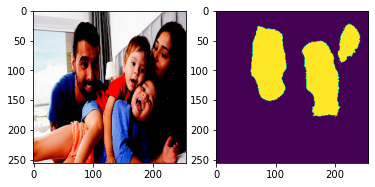

In [179]:
f, ax = plt.subplots(1,2)
ax[0].imshow(x_test[3])
ax[1].imshow(target)

# <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> PART - B (Entertainment)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - 1. Read/import images from folder ‘training_images’.

In [26]:
input_images.shape

(1091, 256, 256, 3)

In [67]:
import os
from PIL import Image

directory = "training_images/"
image_list = os.listdir(directory)
print(len(image_list))
input_images = {}
i = 0
img = None
for image in image_list:
    img = cv2.imread(directory + image)
    #plt.imshow(img)
    #print(f"Before resize Type = {type(img)} and shape = {img.shape}")
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_CUBIC)
    #print(f"After resize Type = {type(img)} and shape = {img.shape}")
    #plt.imshow(img)
    input_images[image] = img
    #print(f"input_images Type = {type(input_images[i])} and shape = {input_images[i].shape}")
    #plt.imshow(input_images[0]);

1091


In [68]:
print(input_images.keys())

dict_keys(['real_00001.jpg', 'real_00002.jpg', 'real_00003.jpg', 'real_00004.jpg', 'real_00005.jpg', 'real_00006.jpg', 'real_00007.jpg', 'real_00008.jpg', 'real_00009.jpg', 'real_00010.jpg', 'real_00011.jpg', 'real_00012.jpg', 'real_00013.jpg', 'real_00014.jpg', 'real_00015.jpg', 'real_00016.jpg', 'real_00017.jpg', 'real_00018.jpg', 'real_00019.jpg', 'real_00020.jpg', 'real_00021.jpg', 'real_00022.jpg', 'real_00023.jpg', 'real_00024.jpg', 'real_00025.jpg', 'real_00026.jpg', 'real_00027.jpg', 'real_00028.jpg', 'real_00029.jpg', 'real_00030.jpg', 'real_00031.jpg', 'real_00032.jpg', 'real_00033.jpg', 'real_00034.jpg', 'real_00035.jpg', 'real_00036.jpg', 'real_00037.jpg', 'real_00038.jpg', 'real_00039.jpg', 'real_00040.jpg', 'real_00041.jpg', 'real_00042.jpg', 'real_00043.jpg', 'real_00044.jpg', 'real_00045.jpg', 'real_00046.jpg', 'real_00047.jpg', 'real_00048.jpg', 'real_00049.jpg', 'real_00050.jpg', 'real_00051.jpg', 'real_00052.jpg', 'real_00053.jpg', 'real_00054.jpg', 'real_00055.jpg',

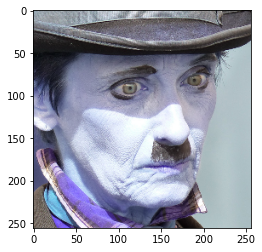

In [69]:
# Some random image
plt.imshow(input_images['real_00077.jpg'])

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - 2. Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images.

In [111]:
model = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_faces(image, file_name, df):
    face_count = 0
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_coordinates = model.detectMultiScale(gray_img)
    #print(face_coordinates)
    for coordinate in face_coordinates:
        (x, y, w, h) = coordinate
        colors = np.random.randint(1, 255, 3)
        cv2.rectangle(image, (x, y), (x + w, y + h), (int(colors[0]), int(colors[1]), int(colors[2])), thickness=2)
        #face_count = 1
        face_count = face_count + 1
        df.loc[len(df.index)] = [x, y, w, h, face_count, file_name] 
    return face_count

In [112]:
input_images['real_00077.jpg'].shape

(256, 256, 3)

In [113]:
detect_faces(input_images['real_00077.jpg'], 'real_00077.jpg', None)

0

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - 3. From the same loop above, extract metadata of the faces and write into a DataFrame

In [114]:
df = pd.DataFrame(columns = ["x", "y", "w","h", 'total_faces', 'image_name'])
for key in input_images:
    detect_faces(input_images[key], key, df)
    
df[df.duplicated(subset=['image_name'])]

,x,y,w,h,total_faces,image_name
40,50,12,144,144,2,real_00054.jpg
239,33,46,121,121,2,real_00306.jpg
334,46,10,140,140,2,real_00431.jpg
753,40,24,181,181,2,real_00977.jpg


In [115]:
df.sample(10)

,x,y,w,h,total_faces,image_name
102,26,12,209,209,1,real_00133.jpg
705,39,62,163,163,1,real_00908.jpg
556,66,43,147,147,1,real_00724.jpg
194,23,12,199,199,1,real_00253.jpg
209,24,45,194,194,1,real_00271.jpg
474,44,77,161,161,1,real_00606.jpg
746,15,33,195,195,1,real_00968.jpg
432,12,31,210,210,1,real_00550.jpg
793,12,53,178,178,1,real_01023.jpg
594,45,61,170,170,1,real_00767.jpg


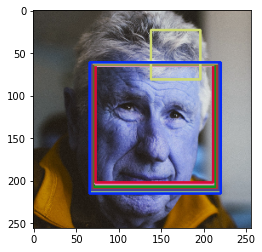

In [116]:
plt.imshow(input_images['real_00380.jpg'])

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkgreen;">Model has predicted less than 1% of images has more than one face coordinates. On further look into those images we found the model incorrectly identified them. When we run the detection multiple times the number of errors are going down or up by one or two counts

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part B - 4. Save the output Dataframe in .csv format

In [117]:
df.to_csv('training_images_face_detected.csv')

# <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> PART - C (Face Recognition)

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part C - 1. Unzip, read and Load data(‘PINS.zip’) into session.

In [13]:
#!pip install mtcnn

In [14]:
from zipfile import ZipFile

In [15]:
zip_directory='/tmp'

In [16]:
# FileNotFoundError: [Errno 2] No such file or directory: '\\tmp\\PINS\\pins_Natalie Portman \\Natalie Portman 37.jpg'
# FileNotFoundError: [Errno 2] No such file or directory: '\\tmp\\__MACOSX\\PINS\\pins_Natalie Portman \\._Natalie Portman 37.jpg'
# Few more files....
# The above error fixed manually in PINS.zip using winrar...? Is there a way to address space this issue in python itself
file = ZipFile('PINS.zip')
file.extractall(zip_directory)

In [17]:
# Read directory name and convert it as Series
import os

image_location = zip_directory + '/' + 'PINS'
dir_name = os.listdir(path=image_location)
labels = []
for dir in dir_name:
    if os.path.isdir(image_location + '/' + dir):
        labels.append(dir)

In [18]:
labels

['pins_Aaron Paul',
 'pins_alexandra daddario',
 'pins_Alvaro Morte',
 'pins_alycia debnam carey face',
 'pins_Amanda Crew',
 'pins_Amaury Nolasco',
 'pins_amber heard face',
 'pins_Anna Gunn',
 'pins_anne hathaway',
 'pins_barbara palvin face',
 'pins_bellamy blake face',
 'pins_Benedict Cumberbatch',
 'pins_Betsy Brandt',
 'pins_bill gates',
 'pins_Brenton Thwaites',
 'pins_brie larson',
 'pins_Brit Marling',
 'pins_Bryan Cranston',
 'pins_Caity Lotz',
 'pins_Cameron Monaghan',
 'pins_chadwick boseman face',
 'pins_Chance Perdomo',
 'pins_Chris Evans',
 'pins_Chris Pratt',
 'pins_Cobie Smulders',
 'pins_Danielle Panabaker',
 'pins_Dave Franco',
 'pins_david mazouz',
 'pins_Dominic Purcell',
 'pins_drake',
 'pins_dua lipa face',
 'pins_Dwayne Johnson',
 'pins_eliza taylor',
 'pins_elizabeth olsen face',
 'pins_elon musk',
 'pins_Emilia Clarke',
 'pins_Emily Bett Rickards',
 'pins_Emma Stone',
 'pins_emma watson face',
 'pins_gal gadot face',
 'pins_grant gustin face',
 'pins_Gwyneth P

In [19]:
#label_series = pd.Series(labels)
#label_series = label_series.str.removeprefix("pins_")
#label_series

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part C - 2. Write function to create metadata of the image

In [20]:
def create_metadata(labels):
    df = pd.DataFrame(columns=['label', 'total_image', 'location', 'image_list'])
    base_dir  = zip_directory + '/' + 'PINS'
    for label in labels:
        pin_directory = zip_directory + '/' + 'PINS' + '/' + label
        image_list = os.listdir(pin_directory)
        total_image = len(image_list)
        location = os.path.abspath(pin_directory)
        df.loc[len(df.index)] = [label.removeprefix("pins_"), total_image, location, image_list] 
    return df
create_metadata(labels)

,label,total_image,location,image_list
0,Aaron Paul,86,E:\tmp\PINS\pins_Aaron Paul,"[Aaron Paul0_262.jpg, Aaron Paul101_247.jpg, A..."
1,alexandra daddario,165,E:\tmp\PINS\pins_alexandra daddario,"[alexandra daddario0.jpg, alexandra daddario1...."
2,Alvaro Morte,91,E:\tmp\PINS\pins_Alvaro Morte,"[Alvaro Morte100_825.jpg, Alvaro Morte101_873...."
3,alycia debnam carey face,144,E:\tmp\PINS\pins_alycia debnam carey face,"[alycia debnam carey face1.jpg, alycia debnam ..."
4,Amanda Crew,118,E:\tmp\PINS\pins_Amanda Crew,"[Amanda Crew0.jpg, Amanda Crew1.jpg, Amanda Cr..."
...,...,...,...,...
95,Ursula Corbero,80,E:\tmp\PINS\pins_Ursula Corbero,"[Ursula Corbero101_2348.jpg, Ursula Corbero104..."
96,Wentworth Miller,113,E:\tmp\PINS\pins_Wentworth Miller,"[Wentworth Miller0.jpg, Wentworth Miller10.jpg..."
97,Willa Holland,147,E:\tmp\PINS\pins_Willa Holland,"[Willa Holland0.jpg, Willa Holland1.jpg, Willa..."
98,William Fichtner,139,E:\tmp\PINS\pins_William Fichtner,"[William Fichtner0.jpg, William Fichtner1.jpg,..."


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part C - 3. Write a loop to iterate through each and every image and create metadata for all the images

In [21]:
from PIL import Image

def create_image_metadata(labels):
    df = pd.DataFrame(columns=['label', 'image_url', 'format', 'mode', 'size', 'width', 'height'])
    base_dir  = zip_directory + '/' + 'PINS'
    for label in labels:
        pin_directory = zip_directory + '/' + 'PINS' + '/' + label
        image_list = os.listdir(pin_directory)
        for image_file in image_list:
            image_url = pin_directory + '/' + image_file
            # TODO - Find a way to perform this without opening file for further optimization
            image = Image.open(image_url)
            df.loc[len(df.index)] = [label.removeprefix("pins_"), image_url, image.format, image.mode, image.size,image.width,image.height]
            image.close()
    return df
df = create_image_metadata(labels)
df

,label,image_url,format,mode,size,width,height
0,Aaron Paul,/tmp/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg,JPEG,RGB,"(299, 301)",299,301
1,Aaron Paul,/tmp/PINS/pins_Aaron Paul/Aaron Paul101_247.jpg,JPEG,RGB,"(299, 299)",299,299
2,Aaron Paul,/tmp/PINS/pins_Aaron Paul/Aaron Paul101_248.jpg,JPEG,RGB,"(299, 299)",299,299
3,Aaron Paul,/tmp/PINS/pins_Aaron Paul/Aaron Paul101_249.jpg,JPEG,RGB,"(299, 299)",299,299
4,Aaron Paul,/tmp/PINS/pins_Aaron Paul/Aaron Paul103_217.jpg,JPEG,RGB,"(299, 299)",299,299
...,...,...,...,...,...,...,...
10765,zendaya,/tmp/PINS/pins_zendaya/zendaya95.jpg,JPEG,RGB,"(299, 299)",299,299
10766,zendaya,/tmp/PINS/pins_zendaya/zendaya96.jpg,JPEG,RGB,"(299, 299)",299,299
10767,zendaya,/tmp/PINS/pins_zendaya/zendaya97.jpg,JPEG,RGB,"(299, 299)",299,299
10768,zendaya,/tmp/PINS/pins_zendaya/zendaya98.jpg,JPEG,RGB,"(299, 299)",299,299


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part C - 4. Generate Embeddings vectors on the each face in the dataset

In [22]:
## Refer https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

# Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))	
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

# Load VGG Face model weights
model.load_weights('vgg_face_weights.h5')

In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 226, 226, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 226, 226, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                        

In [24]:
model.layers[0].input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>

In [25]:
model.layers[-2].output

<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>

In [26]:
vgg_model = Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

def get_embeddeings(file):
    # Following additional dimension is because the model is trained along with shape
    # If we don't provide shape we are getting error hence adding dimension. O/wise we get
    # following error
    # ValueError: Input 0 of layer "model_8" is incompatible with the layer: expected 
    #             shape=(None, 224, 224, 3), found shape=(32, 224, 3)
    faces = cv2.imread(file)
    if (faces != None):
        faces = tf.expand_dims(faces, axis=0)
        yhat = vgg_model.predict(faces)
        return yhat
    else:
        return None

In [27]:
def get_embeddings(file):
    pixels = plt.imread(file)
    img = (pixels / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224, 224))
    return vgg_model.predict(np.expand_dims(img, axis = 0))[0]

In [28]:
get_embeddings('/tmp/PINS/pins_zendaya/zendaya95.jpg')

1/1 [==============================] - 1s 1s/step


array([ 0.00850247,  0.01246666, -0.00141097, ..., -0.01988269,
        0.01813465,  0.03000082], dtype=float32)

In [29]:
get_embeddings('/tmp/PINS/pins_Aaron Paul/Aaron Paul101_248.jpg')

1/1 [==============================] - 0s 260ms/step


array([ 0.0281366 , -0.00117784, -0.01266476, ..., -0.00913905,
       -0.00583596,  0.02124808], dtype=float32)

In [30]:
import csv
import os

In [31]:

    
#pd.DataFrame(prediction[0].reshape(1,-1))
#df.append(pd.DataFrame(prediction[0].reshape(1,-1)))
#count = 0
#for i in range(len(df)):
    #image_url = df.loc[i, "image_url"]
    #print(image_url)
    #embeddings = get_embeddings(image_url)
    #print(len(embeddings[0]))
    #df2 = pd.DataFrame([pd.Series(embeddings[0])])
    #df2.columns = ['team_{}'.format(x+1) for x in df2.columns]
    #df2.loc[i, "image_url"] = image_url
    #df_embedding.append(pd.Series(embeddings))
    #for col in range(len(embeddings[0])):
        #df['embeddings_'+str(col+1)] = np.NaN
    #if (count == 10): 
        #break
    #else:
        #count += 1
#df_embedding.sample(2)
# The embedding creation took lot of time - we should save time if we have to rerun these by loading it
# from CSV. Hence persist the embedding during first run.
#embeddings = []
if (os.path.isfile('pins_embeddings.csv') == False):
    embeddings = np.zeros((df.shape[0], 2622))
    for i in range(len(df)):
        image_url = df.loc[i, "image_url"]
        embeddings[i] = get_embeddings(image_url)
    np.savetxt("pins_embeddings.csv", embeddings, delimiter =", ", fmt ='% s')
else:
    embeddings = pd.read_csv('pins_embeddings.csv', header=None).values

In [32]:
print(type(embeddings))

<class 'numpy.ndarray'>


In [33]:
#!pip install keras_vggface
#!pip install keras_applications

In [34]:
# TODO - Check this later
#from keras_vggface.utils import decode_predictions
#results = decode_predictions(prediction)
#print(type(results[0]))
#for result in results[0]:
#    print('%s: %.2f%%' % (result[0], result[1]))

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part C - 5. Build distance metrics for identifying the distance between two similar and dissimilar images

In [35]:
from scipy.spatial.distance import cosine

def find_distance(emb_1, emb_2):
    #score = cosine(emb_1, emb_2)
    #return score
    #return sum(abs(val1-val2) for val1, val2 in zip(emb_1,emb_2))
    return np.sum(np.square(emb_1 - emb_2))

In [36]:
print(f"{find_distance(embeddings[0],embeddings[4])}, {find_distance(embeddings[10],embeddings[24])}, \
      {find_distance(embeddings[6],embeddings[16])},{find_distance(embeddings[5],embeddings[50])}")

0.25299505979774867, 0.2675171153252266,       0.14032583402813092,0.17090186609271477


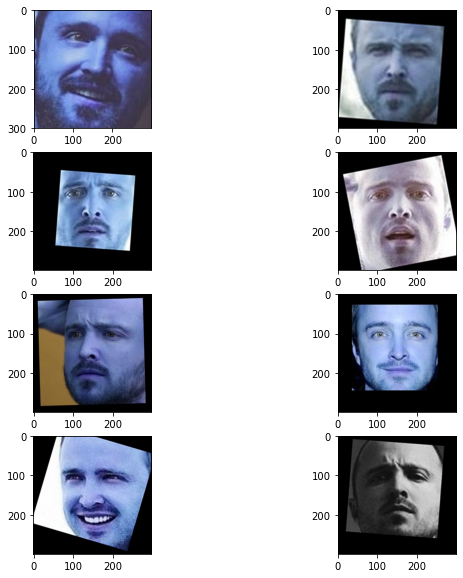

In [37]:
f, ax = plt.subplots(4,2,figsize=(10,10))
ax[0,0].imshow(cv2.imread(df.loc[0, 'image_url'], 1))
ax[0,1].imshow(cv2.imread(df.loc[4, 'image_url'], 1))
ax[1,0].imshow(cv2.imread(df.loc[10, 'image_url'], 1))
ax[1,1].imshow(cv2.imread(df.loc[24, 'image_url'], 1))
ax[2,0].imshow(cv2.imread(df.loc[6, 'image_url'], 1))
ax[2,1].imshow(cv2.imread(df.loc[16, 'image_url'], 1))
ax[3,0].imshow(cv2.imread(df.loc[5, 'image_url'], 1))
ax[3,1].imshow(cv2.imread(df.loc[50, 'image_url'], 1))

### Third and fourth image were showing less distance and matching 

In [40]:
find_distance(get_embeddings(df.loc[0, 'image_url']),get_embeddings(df.loc[1000, 'image_url']))

1/1 [==============================] - 0s 250ms/step


0.81256354

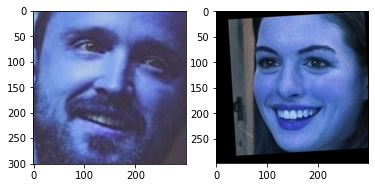

In [41]:
f, ax = plt.subplots(1,2)
ax[0].imshow(cv2.imread(df.loc[0, 'image_url'], 1))
ax[1].imshow(cv2.imread(df.loc[1000, 'image_url'], 1))

### The distance is high for the image

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part C - 6. Use PCA for dimensionality reduction

In [42]:
# Create datafrme
columns = np.zeros((df.shape[0], 2622))
columns = ['embeddings_{}'.format(x+1) for x in range(0,2622)]
new_df = pd.read_csv ('pins_embeddings.csv',header=None, names=columns);
result = pd.concat([df, new_df], axis=1)

In [43]:
result

,label,image_url,format,mode,size,width,height,embeddings_1,embeddings_2,embeddings_3,...,embeddings_2613,embeddings_2614,embeddings_2615,embeddings_2616,embeddings_2617,embeddings_2618,embeddings_2619,embeddings_2620,embeddings_2621,embeddings_2622
0,Aaron Paul,/tmp/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg,JPEG,RGB,"(299, 301)",299,301,0.031703,-0.015051,-0.012434,...,-0.014545,-0.010316,-0.026524,-0.003230,0.005922,-0.006850,-0.026865,0.000431,0.002191,-0.009081
1,Aaron Paul,/tmp/PINS/pins_Aaron Paul/Aaron Paul101_247.jpg,JPEG,RGB,"(299, 299)",299,299,0.034977,-0.001051,-0.012489,...,0.005917,0.002639,-0.002676,0.001841,0.014729,-0.017615,-0.017724,-0.010531,0.001793,0.024392
2,Aaron Paul,/tmp/PINS/pins_Aaron Paul/Aaron Paul101_248.jpg,JPEG,RGB,"(299, 299)",299,299,0.028019,-0.001126,-0.012657,...,0.001315,0.011143,0.001364,-0.004893,0.026007,-0.014651,-0.013197,-0.009048,-0.005784,0.021258
3,Aaron Paul,/tmp/PINS/pins_Aaron Paul/Aaron Paul101_249.jpg,JPEG,RGB,"(299, 299)",299,299,0.015053,-0.005032,-0.001554,...,-0.001966,-0.003615,-0.006404,0.004674,0.005724,-0.012646,-0.012432,-0.005771,-0.005933,0.015859
4,Aaron Paul,/tmp/PINS/pins_Aaron Paul/Aaron Paul103_217.jpg,JPEG,RGB,"(299, 299)",299,299,0.033135,-0.005430,0.000640,...,-0.006420,-0.005175,-0.015014,-0.003891,-0.001147,-0.015746,-0.017381,0.001666,-0.003030,-0.000164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10765,zendaya,/tmp/PINS/pins_zendaya/zendaya95.jpg,JPEG,RGB,"(299, 299)",299,299,0.008489,0.012493,-0.001336,...,0.008995,-0.001072,0.006821,0.016205,0.021705,-0.005900,-0.014663,-0.019889,0.018059,0.030051
10766,zendaya,/tmp/PINS/pins_zendaya/zendaya96.jpg,JPEG,RGB,"(299, 299)",299,299,0.017513,0.018828,0.003153,...,0.016730,-0.007829,0.016591,0.015786,0.024753,0.003548,-0.009960,-0.011584,0.019994,0.031468
10767,zendaya,/tmp/PINS/pins_zendaya/zendaya97.jpg,JPEG,RGB,"(299, 299)",299,299,0.009659,0.003722,-0.013459,...,0.020985,0.004571,0.016368,0.028211,0.023190,-0.002768,-0.010998,-0.014334,0.018999,0.038992
10768,zendaya,/tmp/PINS/pins_zendaya/zendaya98.jpg,JPEG,RGB,"(299, 299)",299,299,0.002309,0.000948,-0.005448,...,0.007597,0.003006,0.025894,0.015311,0.026293,0.002197,-0.002037,-0.016005,0.010540,0.036832


In [44]:
from sklearn.preprocessing import LabelEncoder

# Drop unneccessary column
data = result.drop(['image_url','size'], axis=1);

# Encode label
# Encode labels
#format = en.fit_transform(data['format'])
#mode = en.fit_transform(data['mode'])
# print(mode)

# format and mode is constant - let us drop it.
# Let us also remove width and height
data = data.drop(['format', 'mode', 'width','height'], axis=1)

X = data.drop('label', axis=1)
Y = data['label']
#Y

In [45]:
from sklearn.model_selection import train_test_split
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [46]:
print(f"x_train=>{x_train.shape} x_test=>{x_test.shape} y_train=>{y_train.shape} y_test=>{y_test.shape}")

x_train=>(8616, 2622) x_test=>(2154, 2622) y_train=>(8616,) y_test=>(2154,)


In [47]:
en = LabelEncoder()
y_train = en.fit_transform(y_train)
y_test = en.transform(y_test)

In [48]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA 

In [49]:
scalar = StandardScaler()
x_train_sc = pd.DataFrame(scalar.fit_transform(x_train)) #scaling the data
x_test_sc = pd.DataFrame(scalar.transform(x_test)) #scaling the data

[3.56005978e+02 1.41294998e+02 1.04310784e+02 ... 4.20164883e-06
 4.11107836e-06 2.35420705e-07]
[[-0.02391049  0.00859661 -0.00305937 ... -0.00832642  0.02108312
   0.03891344]
 [ 0.02136904 -0.00106379  0.00839815 ... -0.02324436 -0.00508362
   0.01083162]
 [ 0.00162886 -0.000472   -0.01279274 ...  0.01071663 -0.00440354
  -0.01936607]
 ...
 [ 0.00132549 -0.00106414 -0.00033552 ...  0.0008755   0.00055552
   0.00164009]
 [-0.00056749 -0.00120274  0.0006365  ... -0.00043251  0.00057425
  -0.0001662 ]
 [-0.01704613 -0.02096658 -0.01870387 ... -0.01938404 -0.01911499
  -0.02315766]]
2622


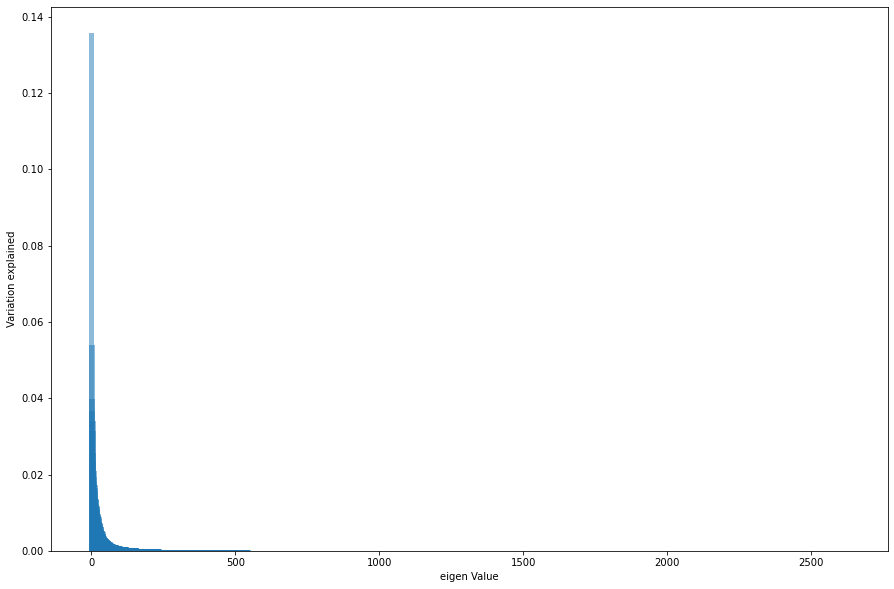

In [50]:
pca = PCA(n_components=2622)
pca.fit(x_train_sc)
print(pca.explained_variance_)
print(pca.components_)
print(len(pca.explained_variance_ratio_))
plt.figure(figsize = (15 , 10))
plt.bar(list(range(1,2623)),pca.explained_variance_ratio_,alpha=0.5, align='center', width=20)
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

### Less than 500 components are sufficient as per PCA

In [51]:
pca3 = PCA(0.95).fit(x_train_sc)
print(pca3.n_components_)
#print(pca3.explained_variance_ratio_)
#pca3.n_features_
x_train_sc_pca = pca3.transform(x_train_sc)
x_test_sc_pca = pca3.transform(x_test_sc)
#x_pca = pd.DataFrame(pca_data,columns=X.columns[0:pca3.n_components_])
#x_pca.sample()

346


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part C - 7. Build an SVM classifier in order to map each image to its right person

In [52]:
from sklearn import svm
from sklearn.metrics import classification_report


def eval_svm(X_train, Y_train, X_test, Y_test):
    svm_clf = svm.SVC(C = 1, gamma = 0.0001, kernel = 'rbf', class_weight = 'balanced', random_state = 32);
    svm_clf.fit(X_train , Y_train)
    pl = svm_clf.predict(X_test)
    print('Classification Report: \n{}'.format(classification_report(Y_test, pl)))
    return svm_clf

In [53]:
#svm = eval_svm(pd.DataFrame(x_train,columns=x_train.columns[0:pca3.n_components_]), y_train, pd.DataFrame(x_test,columns=x_test.columns[0:pca3.n_components_]), y_test)

svm = eval_svm(x_train_sc_pca, y_train, x_test_sc_pca, y_test)

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      1.00      1.00        17
           2       1.00      0.97      0.98        30
           3       1.00      0.94      0.97        17
           4       1.00      0.86      0.92         7
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        14
           7       0.96      0.96      0.96        28
           8       1.00      0.96      0.98        27
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00        24
          11       1.00      0.95      0.98        22
          12       1.00      1.00      1.00        16
          13       0.91      1.00      0.95        20
          14       0.97      1.00      0.98        31
          15       1.00      1.00      1.00        15
          16       1.00      0.96      0.98        25
   

### Test accuracy is 96%

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part C - 8. Import and display the the test images

#### Hint: Test images are given by the project team


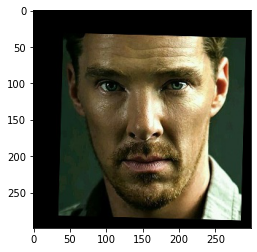

In [90]:
plt.imshow(plt.imread('Benedict Cumberbatch9.jpg'))

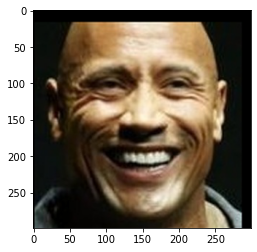

In [91]:
plt.imshow(plt.imread('Dwayne Johnson4.jpg'))

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.7em;color:darkorange;">  Part C - 9 Use the trained SVM model to predict the face on both test images

In [79]:
def test_images(image_file):
    test_embedding = []
    test_embedding = get_embeddings(image_file)
    # print(test_embedding)
    scaled_embedding = scalar.transform(test_embedding.reshape(1, -1))
   # print("Running svm....")
    value = svm.predict(pca3.transform(scaled_embedding))
    #print(f"value is {value}")
    return value

In [80]:
prediction_1 = test_images('Benedict Cumberbatch9.jpg')
print(prediction_1)

1/1 [==============================] - 0s 197ms/step
[5]


E:\Software\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [81]:
en.inverse_transform(prediction_1)
#pred_name = en.inverse_transform(sample_pred)[0].split('_')[-1].title().strip()

array(['Benedict Cumberbatch'], dtype=object)

In [82]:
prediction_2 = test_images('Dwayne Johnson4.jpg')

1/1 [==============================] - 0s 196ms/step


E:\Software\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [89]:
en.inverse_transform(prediction_2)

array(['Dwayne Johnson'], dtype=object)

### The SCV algorithm was able to detect the faces properly for the given embeddings generated using vgg_model.